#Load Data

Problemstatement: In the USA market, is there any sector where the loans are in general smaller, and is there a gender that tend to get more loans?




In [2]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'numpy'

In [55]:
af=pd.read_csv('/content/kiva_loans.csv')

In [56]:
# Here, im making an initial check of the dataset
af.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


#Data Cleaning

In [57]:
#Data Cheaning: Out of the total rows in the dataset, 1611 rows have no information for the borrower_gender field. This is crucial that we clean those cells, because we will need to use borrower_genders, to answer our problem statement
print(af.isna().sum())

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64


In [58]:
af = af.dropna(subset=['borrower_genders']) #Dropper rækker med intet indhold

In [59]:
#Here i check again, and see that borrower_genders is now 0. Great.
print(af.isna().sum())

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                       11
country_code               8
country                    0
region                 52579
currency                   0
partner_id             13088
posted_time                0
disbursed_time          1981
funded_time            47649
term_in_months             0
lender_count               0
tags                  170107
borrower_genders           0
repayment_interval         0
date                       0
dtype: int64


In [78]:
# After i found out that the variable "borrower_gender" had more then 2 collums with genders in them, we had to drop all other genders than the top two.
top_genders = af_usa['borrower_genders'].value_counts().nlargest(2).index
af_usa = af_usa[af_usa['borrower_genders'].isin(top_genders)]

In [79]:
print(af_usa['borrower_genders'].unique())

['female' 'male']


In [61]:
#First, i group the contries, with the loan amount, and then sunms it up. This was done, because the currecny was different, from country to country, which means i could not compare it overall, unless i calculatted the same currency.
# Then i created a new variable, that has the top 10 countries, and sorted the values descending, and only took the top 10.
country_loans = af.groupby('country')['loan_amount'].sum()
top_10_countries = country_loans.sort_values(ascending=False).head(10)
print(top_10_countries)

country
Philippines      55301500.0
Kenya            34184350.0
United States    30780075.0
Peru             30708825.0
Paraguay         29514025.0
El Salvador      26251700.0
Cambodia         19841325.0
Bolivia          19695725.0
Rwanda           16616750.0
Uganda           15209525.0
Name: loan_amount, dtype: float64


In [62]:
af_usa = af[af['country'] == 'United States']

#Visualisering

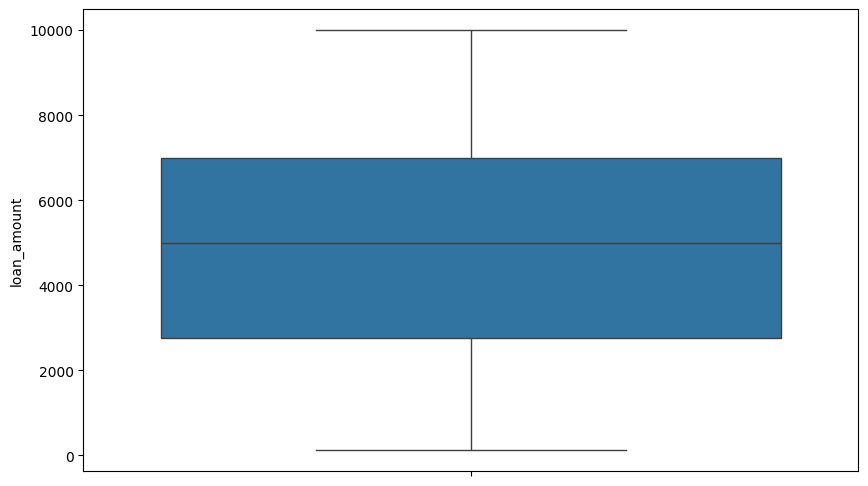

In [82]:
# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=af_usa, y='loan_amount')
plt.show()


In [90]:
# To get an overview of the variables
af_usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5927 entries, 99 to 670915
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5927 non-null   int64  
 1   funded_amount       5927 non-null   float64
 2   loan_amount         5927 non-null   float64
 3   activity            5927 non-null   object 
 4   sector              5927 non-null   object 
 5   use                 5922 non-null   object 
 6   country_code        5927 non-null   object 
 7   country             5927 non-null   object 
 8   region              914 non-null    object 
 9   currency            5927 non-null   object 
 10  partner_id          915 non-null    float64
 11  posted_time         5927 non-null   object 
 12  disbursed_time      3984 non-null   object 
 13  funded_time         3773 non-null   object 
 14  term_in_months      5927 non-null   float64
 15  lender_count        5927 non-null   int64  
 16  tags    

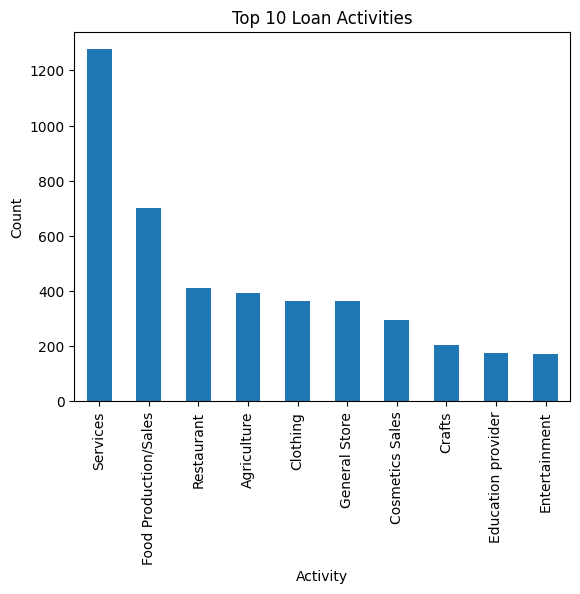

In [84]:
# First i create a new variabl. Here i do a simple value count
activity_counts = af_usa['activity'].value_counts()
# Take the top 10
top_activities = activity_counts.head(10)
top_activities.plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Top 10 Loan Activities')
plt.show()

In [91]:
# NOw to answer my problem statement, i take the data UNDER q1, if we look at the boxplot.
# This represents the lower 25% of loan amounts, as shown in the boxplot
minimum = af_usa['loan_amount'].min()
q1 = af_usa['loan_amount'].quantile(0.25)
# This now filters the data to be BETWEEN minimum and q1
af_filtered_usa = af_usa[(af_usa['loan_amount'] >= minimum) & (af_usa['loan_amount'] <= q1)]

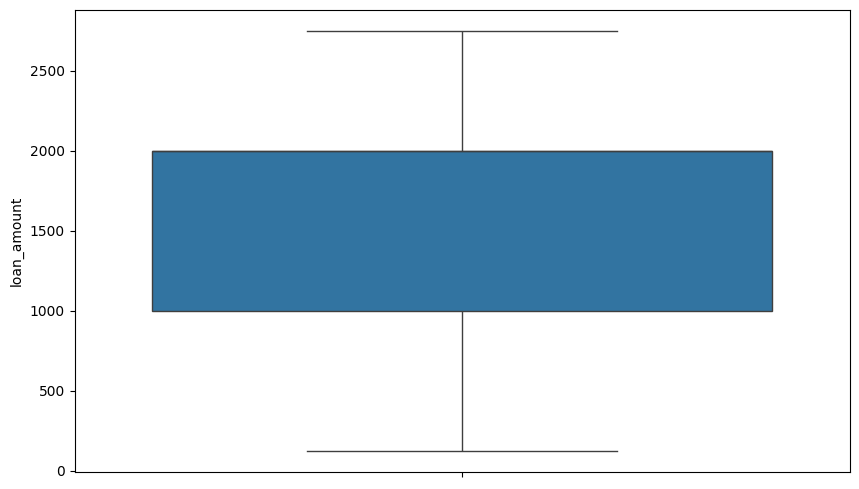

In [92]:
# To show
plt.figure(figsize=(10, 6))
sns.boxplot(data=af_filtered_usa, y='loan_amount')
plt.show()

In [95]:
# To gain an understanding of the variance/Std. deviation they are printet here.
mean_loan_usa = af_usa['funded_amount'].mean()
median_loan_usa = af_usa['funded_amount'].median()
std_loan_usa = af_usa['funded_amount'].std()
variance_loan_usa = af_usa['funded_amount'].var()

mean_loan_usa_under_q1 = af_filtered_usa['funded_amount'].mean()
median_loan_usa_under_q1 = af_filtered_usa['funded_amount'].median()
std_loan_usa_under_q1 = af_filtered_usa['funded_amount'].std()
variance_loan_usa_under_q1 = af_filtered_usa['funded_amount'].var()

print("Mean:", mean_loan_usa)
print("Median:", median_loan_usa)
print("Std. Deviation:", std_loan_usa)
print("Variance:", variance_loan_usa)

print("Mean:", mean_loan_usa_under_q1)
print("Median:", median_loan_usa_under_q1)
print("Std. Deviation:", std_loan_usa_under_q1)
print("Variance:", variance_loan_usa_under_q1)


Mean: 3817.0364433946347
Median: 3000.0
Std. Deviation: 3347.898070945481
Variance: 11208421.493440472
Mean: 1060.2903871829105
Median: 1000.0
Std. Deviation: 983.1589913771331
Variance: 966601.6023257017


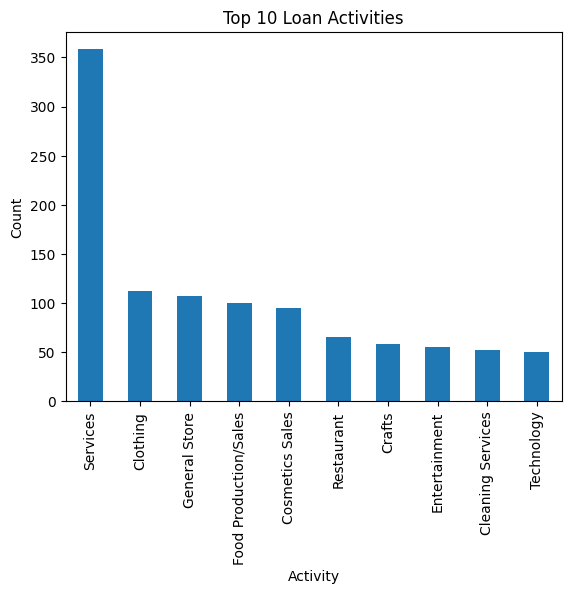

In [68]:
# Now that we have the data for the smaller loans, we first make a simple plot for the counts of each loan.
activity_counts_underq1 = af_filtered_usa['activity'].value_counts()
top_activities_under_q1 = activity_counts_underq1.head(10)
top_activities_under_q1.plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Top 10 Loan Activities')
plt.show()

In [104]:
# To get a deeper understanding of the data compared to all loans, we make a pandas dataframe, with all loans and loans under q1
comparison_df = pd.DataFrame({'all_loans': top_activities, 'loans_under_q1': top_activities_under_q1})

In [106]:
# Find the precentage of smaller loans and sort them
comparison_df['percentage_small_loans'] = (comparison_df['loans_under_q1'] / comparison_df['all_loans']) * 100
comparison_df_sorted = comparison_df.sort_values(by='percentage_small_loans', ascending=False)
print(comparison_df_sorted)




                       all_loans  loans_under_q1  percentage_small_loans
activity                                                                
Cosmetics Sales            295.0            95.0               32.203390
Entertainment              171.0            55.0               32.163743
Clothing                   366.0           112.0               30.601093
General Store              363.0           107.0               29.476584
Crafts                     204.0            58.0               28.431373
Services                  1276.0           358.0               28.056426
Restaurant                 410.0            66.0               16.097561
Food Production/Sales      702.0           100.0               14.245014
Agriculture                393.0             NaN                     NaN
Cleaning Services            NaN            52.0                     NaN
Education provider         176.0             NaN                     NaN
Technology                   NaN            50.0   

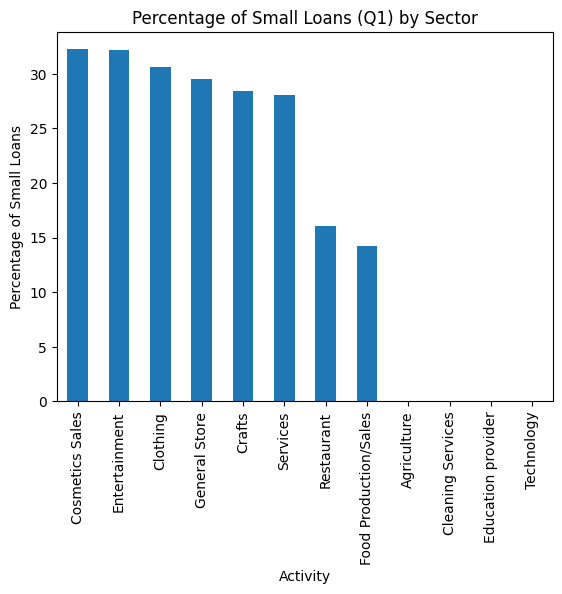

In [107]:
# Plotting it
comparison_df_sorted['percentage_small_loans'].plot(kind='bar')
plt.title('Percentage of Small Loans (Q1) by Sector')
plt.xlabel('Activity')
plt.ylabel('Percentage of Small Loans')
plt.show()

In [108]:
print(af_usa['borrower_genders'].unique())

['female' 'male']


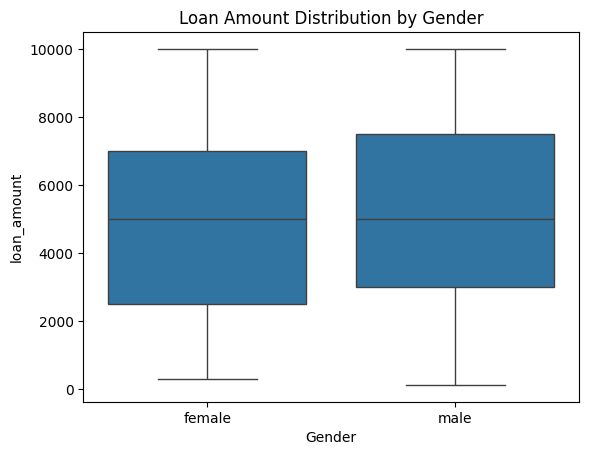

In [111]:
# To answer the last part of the problem formulation i make a boxplot with the loan amount distrubiton by gender
sns.boxplot(x='borrower_genders', y='loan_amount', data=af_usa)
plt.xlabel('Gender')
plt.ylabel('loan_amount')
plt.title('Loan Amount Distribution by Gender')
plt.show()

Conclussion
Smaller loans are more common in the Cosmetics Sales, Entertainment, and Clothing sectors, while sectors like Agriculture tend to get larger loans.

The median loan amounts are similar for both genders, but male borrowers have a wider IQR. This can show that they receive slightly larger loans withitn the q1-q3